# Residual Trading

In [25]:
import pandas as pd
import yfinance as yf

# Get S&P 500 tickers from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(url)
sp500_tickers = sp500_table[0]['Symbol'].tolist()

print(sp500_tickers) # Example: ['AAPL', 'MSFT', 'GOOGL', ...]


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMTM', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BWA', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', '

In [26]:
len(sp500_tickers)

503

In [35]:
def fetch_adj_close(tickers, start_date="2006-01-01", end_date=None):
    data = yf.download(tickers, start=start_date, end=end_date, group_by="ticker")
    adj_close = pd.DataFrame()

    for ticker in tickers:
        if ticker in data.columns.levels[0]:  # Ensure the ticker exists in data
            adj_close[ticker] = data[ticker]['Adj Close']
    return adj_close

# Get the adjusted close prices DataFrame
df = fetch_adj_close(sp500_tickers)

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2006-01-01 -> 2024-11-16)')
C:\Users\zakit\AppData\Local\Temp\ipykernel_38872\97858335.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adj_close[ticker] = data[ticker]['Adj Close']
C:\Users\zakit\AppData\Local\Temp\ipykernel_38872\97858335.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

In [36]:
df.to_csv('sp500_data.csv')


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('sp500_data.csv')
# df=df.iloc[3:]
# df = df.rename(columns={'Unnamed: 0' : 'Date'})
# df=df.set_index('Date')
# df=df.astype(float)
# df=df.pct_change()
# df.head()
df=df.set_index('Date')
df.index = pd.to_datetime(df.index)

In [42]:
df=df.pct_change()
df.head()

C:\Users\zakit\AppData\Local\Temp\ipykernel_38872\2728052853.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df=df.pct_change()


,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00+00:00,-0.005056,0.005427,0.001518,NaN,0.005461,-0.002596,0.004938,0.042593,0.005583,0.002687,...,0.024160,0.006276,0.010385,-0.001854,0.004846,NaN,0.008556,-0.009806,0.009492,NaN
2006-01-05 00:00:00+00:00,-0.009147,-0.009447,0.012875,NaN,0.007468,-0.009110,0.034398,-0.009473,0.008115,0.026198,...,-0.008792,-0.010395,-0.015147,-0.005942,-0.000535,NaN,0.042630,0.002829,-0.010560,NaN
2006-01-06 00:00:00+00:00,0.008206,0.034332,0.019192,NaN,0.049528,0.024429,0.002969,0.016139,0.035798,0.005222,...,0.001478,0.003782,-0.012084,0.009527,0.003753,NaN,-0.002848,0.037385,-0.005117,NaN
2006-01-09 00:00:00+00:00,0.004960,0.033983,0.037173,NaN,-0.002889,-0.015897,-0.015690,-0.017059,0.004704,-0.002886,...,-0.002362,0.016325,0.040589,0.047188,-0.002671,NaN,0.007752,0.015186,0.035415,NaN


In [43]:
df = df.loc[:, df.isnull().sum() <= 0.3*len(df)]

In [44]:
df = df.loc[:, ~df.isin([np.inf]).any()]

In [45]:
df = df.backfill()

C:\Users\zakit\AppData\Local\Temp\ipykernel_38872\3579428054.py:1: FutureWarning: DataFrame.backfill/Series.backfill is deprecated. Use DataFrame.bfill/Series.bfill instead
  df = df.backfill()


In [46]:
len(df.columns)

442

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


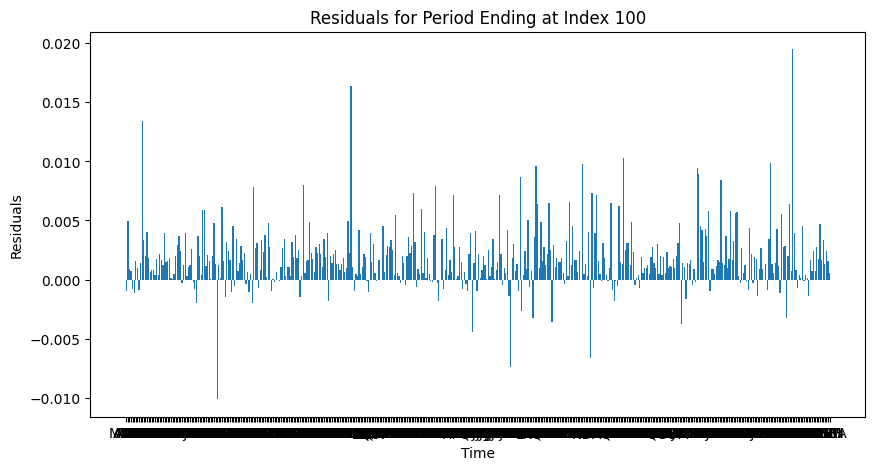

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


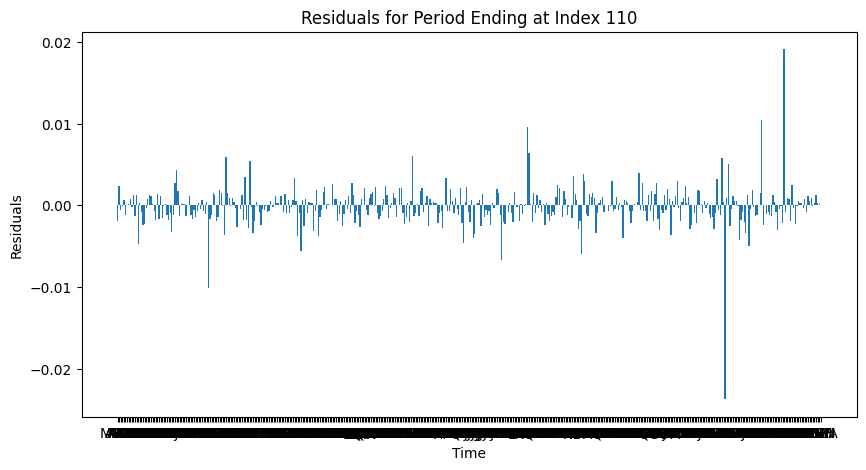

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


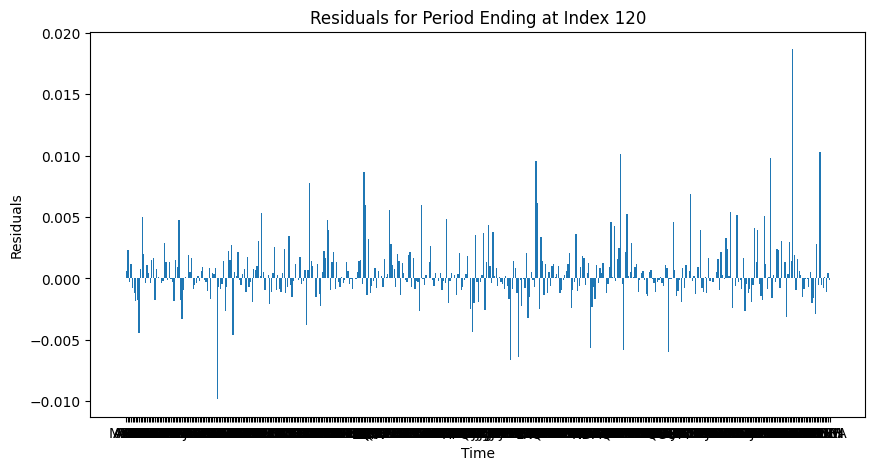

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


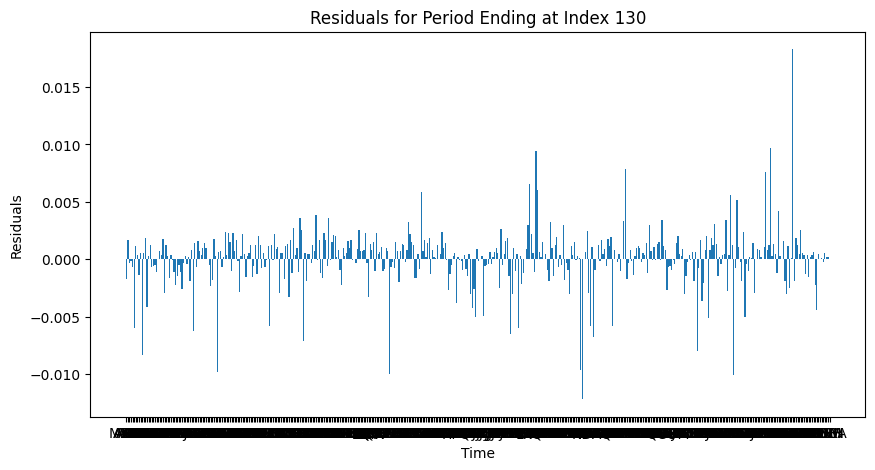

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


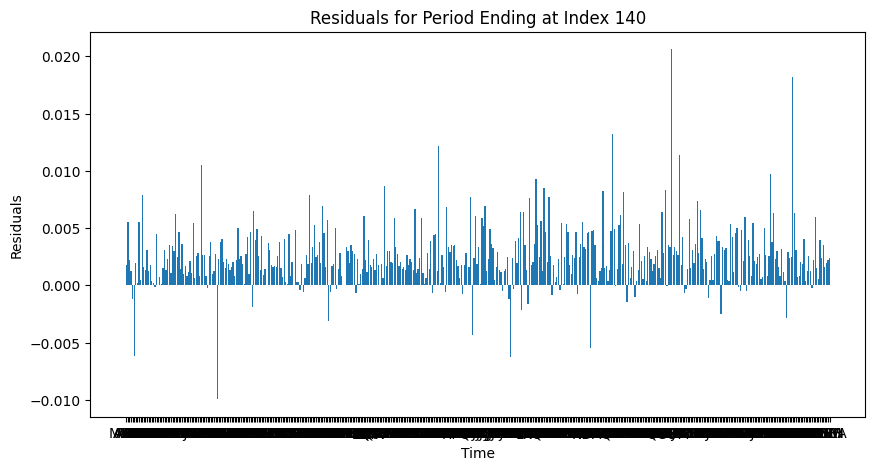

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


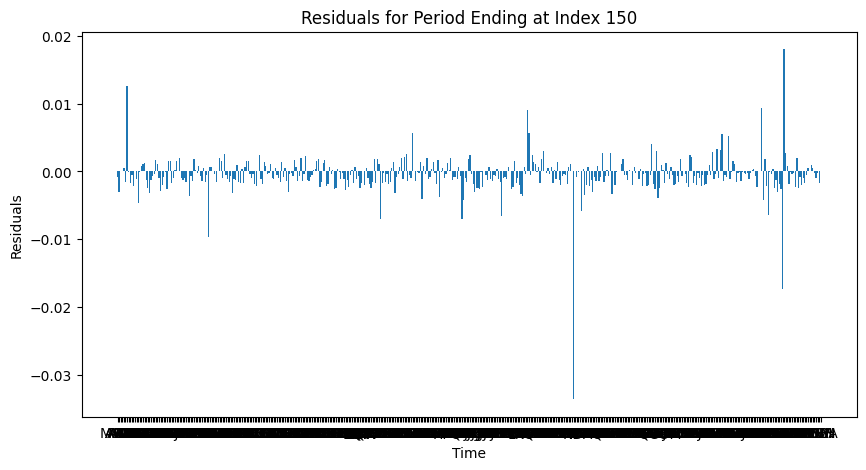

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


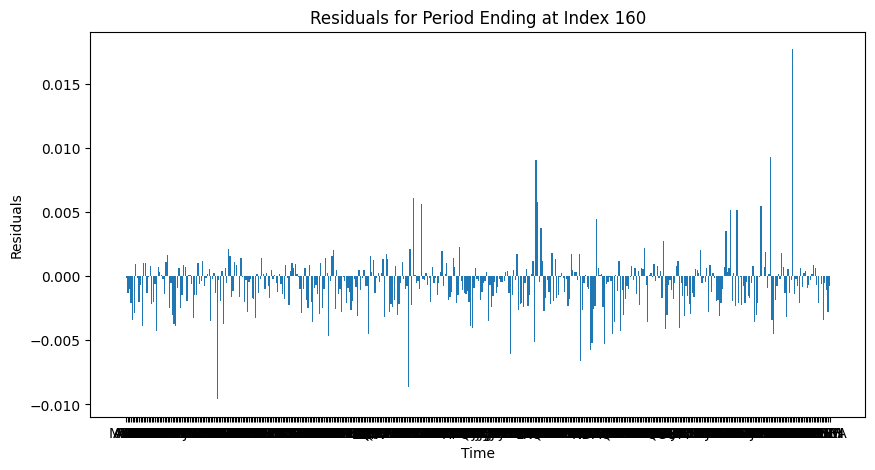

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


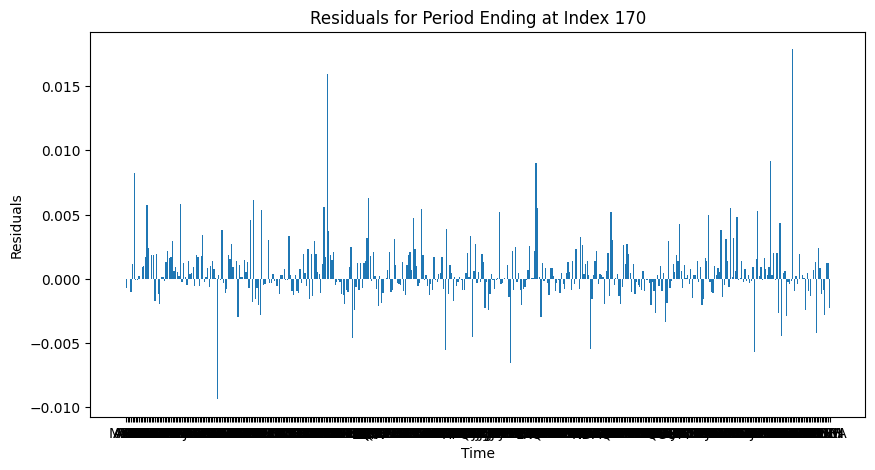

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


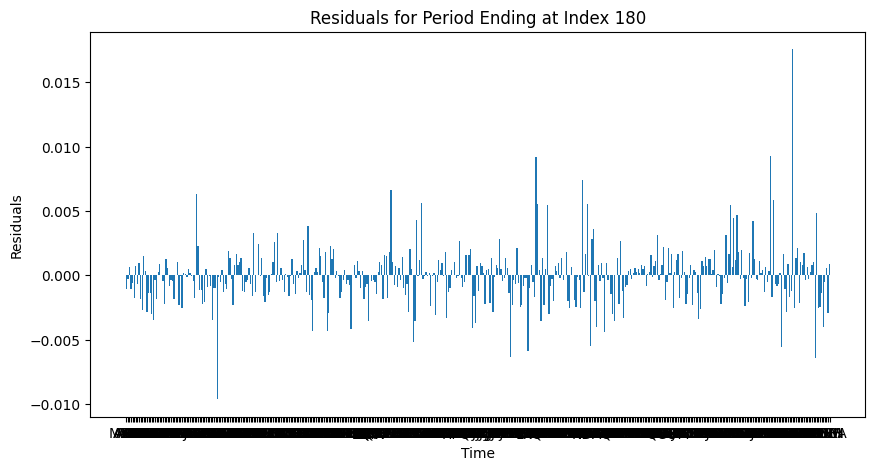

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


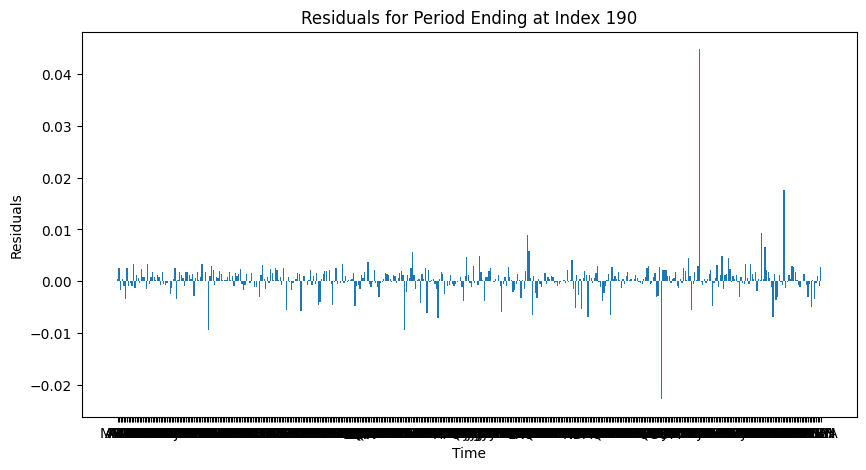

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


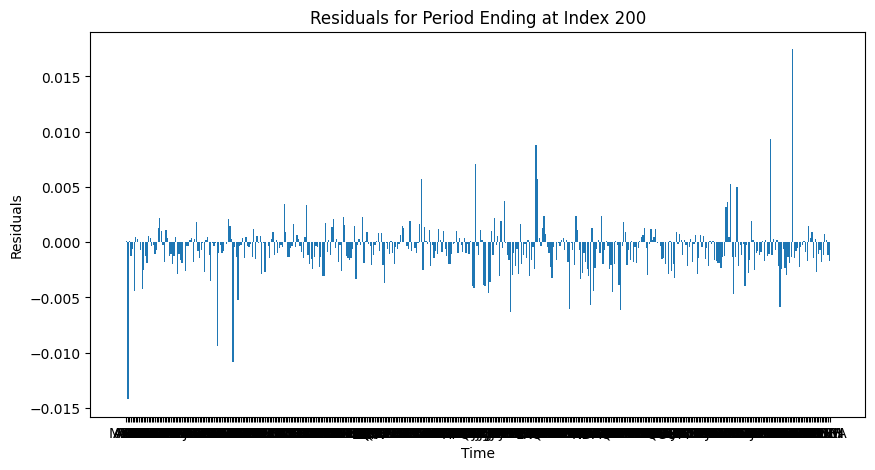

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


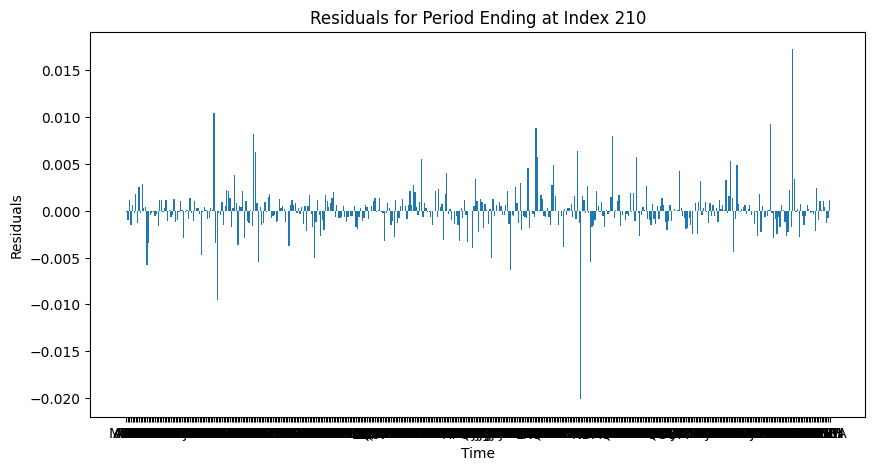

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


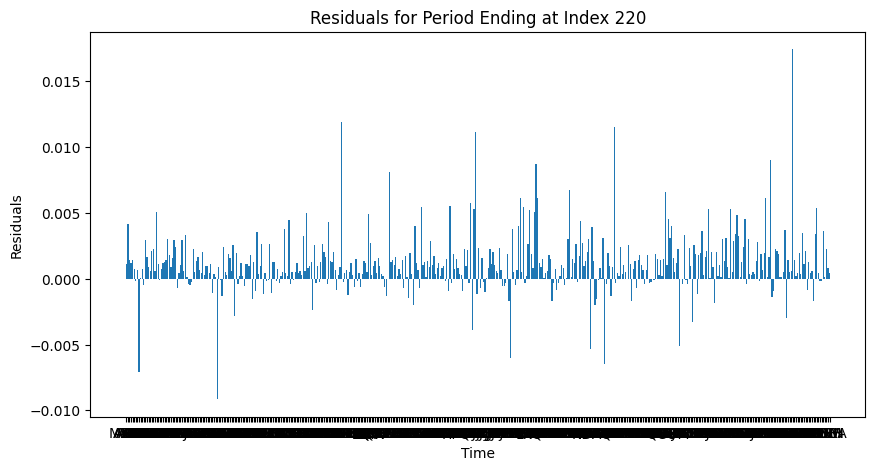

c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zakit\Documents\pca_curve_analysis\venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


KeyboardInterrupt: 

In [50]:

def calc_weights(df, lam=0.985):
    w_vec = []
    for i in range(len(df)):
        w_vec.append((1-lam)*(lam**i))
    w_vec.reverse()
    return w_vec

def run_backtest(df, start_period=100):

    for i in range(start_period, len(df)):
        window = df.iloc[:i]
        window = pd.DataFrame(window, index=window.index, columns=df.columns)
        w_vec = calc_weights(window)

        w_vec = w_vec/np.sum(w_vec)
        w_vec = np.sqrt(w_vec)

        weighted_window = window.mul(w_vec, axis=0)
        cov_mat = np.dot(weighted_window.T, weighted_window)

        eig_vals, eig_vecs = np.linalg.eig(cov_mat)
        idxs = np.argsort(eig_vals[::-1])
        eig_vals = eig_vals[idxs]
        eig_vecs = eig_vecs[idxs]

        top_eig_vals = eig_vals[:3]
        top_eig_vecs = eig_vecs[:3]

        projections = np.dot(weighted_window, top_eig_vecs.T)
        reconstruction = np.dot(projections, top_eig_vecs)
        residuals = np.array(weighted_window)[-1] - reconstruction[-1]

        if i % 10 == 0:

            fig, ax = plt.subplots(figsize=(10, 5))
            ax.bar(df.columns, residuals)
            ax.set_title(f'Residuals for Period Ending at Index {i}')
            ax.set_xlabel('Time')
            ax.set_ylabel('Residuals')
            plt.show()


run_backtest(df)
